In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings        
import plotly.express as px
warnings.filterwarnings('ignore')
%matplotlib inline



In [133]:
df = pd.read_csv(r"C:\Users\Vaishnavi Daule\Downloads\archive (4)\IndianWeatherRepository.csv")

In [134]:
df

country location_name          region  latitude  longitude  \
0        India    Ashoknagar  Madhya Pradesh     24.57      77.72   
1        India        Raisen  Madhya Pradesh     23.33      77.80   
2        India    Chhindwara  Madhya Pradesh     22.07      78.93   
3        India         Betul  Madhya Pradesh     21.86      77.93   
4        India   Hoshangabad  Madhya Pradesh     22.75      77.72   
...        ...           ...             ...       ...        ...   
116106   India        Niwari   Uttar Pradesh     28.88      77.53   
116107   India       Saitual         Mizoram     23.97      92.58   
116108   India       Ranipet      Tamil Nadu     12.93      79.33   
116109   India       Tenkasi      Tamil Nadu      8.97      77.30   
116110   India        Pendra    Chhattisgarh     22.77      81.95   

            timezone  last_updated_epoch      last_updated  \
0       Asia/Kolkata          1693286100  2023-08-29 10:45   
1       Asia/Kolkata          1693286100  2023-08-29 10:45   
2       Asia/Kolkata          1693286100  2023-08-29 10:45   
3       Asia/Kolkata          1693286100  2023-08-29 10:45   
4       Asia/Kolkata          1693286100  2023-08-29 10:45   
...              ...                 ...               ...   
116106  Asia/Kolkata          1711900800  2024-03-31 21:30   
116107  Asia/Kolkata          1711900800  2024-03-31 21:30   
116108  Asia/Kolkata          1711900800  2024-03-31 21:30   
116109  Asia/Kolkata          1711900800  2024-03-31 21:30   
116110  Asia/Kolkata          1711900800  2024-03-31 21:30   

        temperature_celsius  temperature_fahrenheit  ... air_quality_PM2.5  \
0                      27.5                    81.5  ...              12.6   
1                      27.5                    81.5  ...              10.7   
2                      26.3                    79.3  ...              16.8   
3                      25.6                    78.1  ...               4.9   
4                      27.2                    81.0  ...              11.4   
...                     ...                     ...  ...               ...   
116106                 29.0                    84.2  ...              29.1   
116107                 16.8                    62.2  ...              53.4   
116108                 26.7                    80.1  ...              15.2   
116109                 30.0                    86.0  ...              16.7   
116110                 27.2                    81.0  ...              34.7   

        air_quality_PM10  air_quality_us-epa-index  \
0                   18.5                         1   
1                   14.2                         1   
2                   20.7                         2   
3                    6.6                         1   
4                   14.8                         1   
...                  ...                       ...   
116106              54.3                         2   
116107              64.1                         3   
116108              19.8                         1   
116109              20.1                         2   
116110              39.2                         2   

        air_quality_gb-defra-index   sunrise    sunset     moonrise   moonset  \
0                                2  05:59 AM  06:41 PM     05:42 PM  03:38 AM   
1                                1  06:00 AM  06:40 PM     05:39 PM  03:41 AM   
2                                2  05:56 AM  06:34 PM     05:32 PM  03:39 AM   
3                                1  06:00 AM  06:38 PM     05:36 PM  03:43 AM   
4                                1  06:01 AM  06:39 PM     05:38 PM  03:42 AM   
...                            ...       ...       ...          ...       ...   
116106                           3  06:11 AM  06:37 PM  No moonrise  09:38 AM   
116107                           6  05:13 AM  05:36 PM     11:12 PM  08:49 AM   
116108                           2  06:09 AM  06:24 PM     11:39 PM  10:11 AM   
116109                           2  0

In [135]:
cat_cols= df.select_dtypes(include = ['object']).columns
cat_cols

Index(['country', 'location_name', 'region', 'timezone', 'last_updated',
       'condition_text', 'wind_direction', 'sunrise', 'sunset', 'moonrise',
       'moonset', 'moon_phase'],
      dtype='object')

In [136]:
cat_cols = df.select_dtypes(include=['object']).columns
num_categorical_cols = len(cat_cols)
print("Number of categorical columns:", num_categorical_cols)


Number of categorical columns: 12


In [137]:
num_cols = df.select_dtypes(include = ['number']).columns
num_cols

Index(['latitude', 'longitude', 'last_updated_epoch', 'temperature_celsius',
       'temperature_fahrenheit', 'wind_mph', 'wind_kph', 'wind_degree',
       'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity',
       'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km',
       'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph',
       'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index',
       'air_quality_gb-defra-index', 'moon_illumination'],
      dtype='object')

In [138]:
num_cols = df.select_dtypes(include=['number']).columns
num_numerical_cols = len(num_cols)
print("Number of numerical columns:", num_numerical_cols)


Number of numerical columns: 30


In [139]:
df.columns

Index(['country', 'location_name', 'region', 'latitude', 'longitude',
       'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [140]:
# Drop the unnecessesry columns

In [141]:
columns_to_drop = ['cloud','visibility_km','uv_index','country','region','timezone','last_updated_epoch','temperature_fahrenheit','wind_direction','wind_kph','wind_degree','pressure_in','precip_in','feels_like_fahrenheit','feels_like_celsius','visibility_miles','gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination']


In [142]:
df.drop(columns= columns_to_drop,inplace = True)


In [143]:
df.head(10)

location_name  latitude  longitude      last_updated  temperature_celsius  \
0    Ashoknagar     24.57      77.72  2023-08-29 10:45                 27.5   
1        Raisen     23.33      77.80  2023-08-29 10:45                 27.5   
2    Chhindwara     22.07      78.93  2023-08-29 10:45                 26.3   
3         Betul     21.86      77.93  2023-08-29 10:45                 25.6   
4   Hoshangabad     22.75      77.72  2023-08-29 10:45                 27.2   
5        Sehore     23.20      77.08  2023-08-29 10:45                 25.9   
6      Jabalpur     23.17      79.95  2023-08-29 10:45                 28.0   
7   Narsimhapur     22.95      79.20  2023-08-29 10:45                 27.7   
8         Panna     24.72      80.20  2023-08-29 10:45                 30.0   
9        Ujjain     23.18      75.77  2023-08-29 10:45                 26.0   

  condition_text  wind_mph  pressure_mb  precip_mm  humidity  
0  Partly cloudy      12.8       1008.0        0.0        67  
1          Sunny       9.6       1008.0        0.0        70  
2  Partly cloudy      11.4       1009.0        0.0        70  
3         Cloudy      10.5       1009.0        0.0        76  
4         Cloudy      10.1       1009.0        0.0        74  
5         Cloudy       9.8       1009.0        0.0        77  
6           Mist       9.4       1010.0        0.1        70  
7          Sunny      11.0       1008.0        0.0        71  
8          Sunny      11.6       1007.0        0.0        60  
9           Mist      11.9       1012.0        0.0        74

In [144]:
df

location_name  latitude  longitude      last_updated  \
0         Ashoknagar     24.57      77.72  2023-08-29 10:45   
1             Raisen     23.33      77.80  2023-08-29 10:45   
2         Chhindwara     22.07      78.93  2023-08-29 10:45   
3              Betul     21.86      77.93  2023-08-29 10:45   
4        Hoshangabad     22.75      77.72  2023-08-29 10:45   
...              ...       ...        ...               ...   
116106        Niwari     28.88      77.53  2024-03-31 21:30   
116107       Saitual     23.97      92.58  2024-03-31 21:30   
116108       Ranipet     12.93      79.33  2024-03-31 21:30   
116109       Tenkasi      8.97      77.30  2024-03-31 21:30   
116110        Pendra     22.77      81.95  2024-03-31 21:30   

        temperature_celsius condition_text  wind_mph  pressure_mb  precip_mm  \
0                      27.5  Partly cloudy      12.8       1008.0       0.00   
1                      27.5          Sunny       9.6       1008.0       0.00   
2                      26.3  Partly cloudy      11.4       1009.0       0.00   
3                      25.6         Cloudy      10.5       1009.0       0.00   
4                      27.2         Cloudy      10.1       1009.0       0.00   
...                     ...            ...       ...          ...        ...   
116106                 29.0           Mist       9.4       1011.0       0.00   
116107                 16.8            Fog       2.7       1011.0       0.06   
116108                 26.7         Clear        7.8       1013.0       0.00   
116109                 30.0           Mist       2.2       1011.0       0.00   
116110                 27.2         Clear        4.5       1011.0       0.00   

        humidity  
0             67  
1             70  
2             70  
3             76  
4             74  
...          ...  
116106        40  
116107        97  
116108        76  
116109        70  
116110        38  

[116111 rows x 10 columns]

In [110]:
df.tail(10)

location_name  latitude  longitude      last_updated  \
116101  South Suburban     22.50      88.30  2024-03-31 21:30   
116102        Calcutta     22.57      88.37  2024-03-31 21:30   
116103        Shahdara     28.67      77.32  2024-03-31 21:30   
116104        Jhargram     22.45      86.98  2024-03-31 21:30   
116105      Narayanpet     16.73      77.50  2024-03-31 21:30   
116106          Niwari     28.88      77.53  2024-03-31 21:30   
116107         Saitual     23.97      92.58  2024-03-31 21:30   
116108         Ranipet     12.93      79.33  2024-03-31 21:30   
116109         Tenkasi      8.97      77.30  2024-03-31 21:30   
116110          Pendra     22.77      81.95  2024-03-31 21:30   

        temperature_celsius condition_text  wind_mph  pressure_mb  precip_mm  \
116101                 29.0           Mist      11.9       1008.0       0.00   
116102                 29.0           Mist      11.9       1008.0       0.00   
116103                 29.0           Mist       9.4       1011.0       0.00   
116104                 31.4         Clear       13.2       1008.0       0.00   
116105                 33.4         Clear        4.9       1010.0       0.00   
116106                 29.0           Mist       9.4       1011.0       0.00   
116107                 16.8            Fog       2.7       1011.0       0.06   
116108                 26.7         Clear        7.8       1013.0       0.00   
116109                 30.0           Mist       2.2       1011.0       0.00   
116110                 27.2         Clear        4.5       1011.0       0.00   

        humidity  
116101        84  
116102        84  
116103        40  
116104        33  
116105        20  
116106        40  
116107        97  
116108        76  
116109        70  
116110        38

In [111]:
cat_cols= df.select_dtypes(include = ['object']).columns
cat_cols

Index(['location_name', 'last_updated', 'condition_text'], dtype='object')

In [112]:
num_cols = df.select_dtypes(include = ['number']).columns
num_cols

Index(['latitude', 'longitude', 'temperature_celsius', 'wind_mph',
       'pressure_mb', 'precip_mm', 'humidity'],
      dtype='object')

In [113]:
df["location_name"].nunique()


552

In [114]:
df["condition_text"].nunique()

49

In [115]:
count = df["condition_text"].value_counts()

In [116]:
count

condition_text
Clear                                          46266
Clear                                          23423
Mist                                           16454
Partly cloudy                                   9209
Patchy rain possible                            5126
Light rain shower                               2922
Partly Cloudy                                   2130
Fog                                             2017
Overcast                                        1824
Cloudy                                          1367
Patchy rain nearby                              1273
Sunny                                            772
Light rain                                       497
Moderate or heavy rain shower                    404
Overcast                                         332
Light drizzle                                    270
Cloudy                                           253
Moderate or heavy rain with thunder              239
Patchy light drizzle           

# EDA
 * check missing value
 * check duplicates
 * check data type
 * check nunique value
 * check static of dataset
 * check various categories present in the differnt catogorical column

In [117]:
df.isnull()

location_name  latitude  longitude  last_updated  temperature_celsius  \
0               False     False      False         False                False   
1               False     False      False         False                False   
2               False     False      False         False                False   
3               False     False      False         False                False   
4               False     False      False         False                False   
...               ...       ...        ...           ...                  ...   
116106          False     False      False         False                False   
116107          False     False      False         False                False   
116108          False     False      False         False                False   
116109          False     False      False         False                False   
116110          False     False      False         False                False   

        condition_text  wind_mph  pressure_mb  precip_mm  humidity  
0                False     False        False      False     False  
1                False     False        False      False     False  
2                False     False        False      False     False  
3                False     False        False      False     False  
4                False     False        False      False     False  
...                ...       ...          ...        ...       ...  
116106           False     False        False      False     False  
116107           False     False        False      False     False  
116108           False     False        False      False     False  
116109           False     False        False      False     False  
116110           False     False        False      False     False  

[116111 rows x 10 columns]

In [118]:
df.isnull().sum()

location_name          0
latitude               0
longitude              0
last_updated           0
temperature_celsius    0
condition_text         0
wind_mph               0
pressure_mb            0
precip_mm              0
humidity               0
dtype: int64

# check duplicates

In [119]:
df.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
116106    False
116107    False
116108    False
116109    False
116110    False
Length: 116111, dtype: bool>

# check datatype

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116111 entries, 0 to 116110
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   location_name        116111 non-null  object 
 1   latitude             116111 non-null  float64
 2   longitude            116111 non-null  float64
 3   last_updated         116111 non-null  object 
 4   temperature_celsius  116111 non-null  float64
 5   condition_text       116111 non-null  object 
 6   wind_mph             116111 non-null  float64
 7   pressure_mb          116111 non-null  float64
 8   precip_mm            116111 non-null  float64
 9   humidity             116111 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 8.9+ MB


In [121]:
df.dtypes

location_name           object
latitude               float64
longitude              float64
last_updated            object
temperature_celsius    float64
condition_text          object
wind_mph               float64
pressure_mb            float64
precip_mm              float64
humidity                 int64
dtype: object

# Cheaking the number of unique values of each column

In [122]:
df.nunique()

location_name          552
latitude               455
longitude              435
last_updated           849
temperature_celsius    587
condition_text          49
wind_mph               103
pressure_mb             69
precip_mm              532
humidity                93
dtype: int64

# check statics of dataset


In [123]:
df.describe()

latitude      longitude  temperature_celsius       wind_mph  \
count  116111.000000  116111.000000        116111.000000  116111.000000   
mean       23.099814      80.245821            20.070123       4.963468   
std         5.790814       5.762872             6.393033       2.771810   
min         7.170000      68.970000           -30.700000       2.200000   
25%        20.270000      76.070000            16.400000       2.700000   
50%        23.950000      78.690000            21.000000       4.300000   
75%        26.770000      83.900000            24.600000       6.300000   
max        34.570000      95.800000            38.400000      26.800000   

         pressure_mb      precip_mm       humidity  
count  116111.000000  116111.000000  116111.000000  
mean     1012.982396       0.085910      62.183282  
std         4.861460       0.615969      23.276352  
min       991.000000       0.000000       8.000000  
25%      1011.000000       0.000000      43.000000  
50%      1014.000000       0.000000      63.000000  
75%      1016.000000       0.000000      83.000000  
max      1073.000000      43.800000     100.000000

## insights
* Average temperature is around 20.07°C, ranging from -30.7°C to 38.4°C.
* Average wind speed is approximately 4.96 mph, ranging from 2.2 mph to 26.8 mph.
* Average atmospheric pressure is about 1012.98 mb, ranging from 991 mb to 1073 mb.
* Average precipitation is around 0.086 mm, ranging from 0 mm to 43.8 mm.
* Average humidity is roughly 62.18%, ranging from 8% to 100%


# Visualization

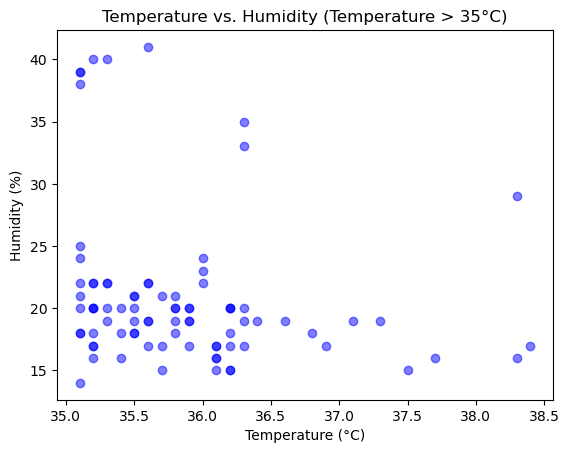

In [124]:
# Filter data based on temperature threshold
filtered_df = df[df['temperature_celsius']>35]

# Create scatter plot
plt.scatter(filtered_df['temperature_celsius'], filtered_df['humidity'], color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs. Humidity (Temperature > 35°C)')
plt.show()


# insights
* Temperature Range:Temperatures span from 35°C to 38.5°C.
* Humidity Concentration:Majority of humidity values are between 15% and 25%.
* Inverse Relationship:Higher temperatures generally correlate with lower humidity.
* Outliers:Some high temperature (>37.5°C) points have very low humidity (~15%).
* Data Clustering:Most points are clustered between 35°C to 36°C and 15% to 25% humidity.
* Humidity Variability:Greater variability in humidity at lower temperatures (~35°C).
* Less variability at higher temperatures (>36°C), with humidity consistently low.







# Take only numeric value for see corr in between

In [125]:
# Assuming df is your DataFrame containing the data
# Drop the non-numeric columns
df = df.select_dtypes(include=np.number)

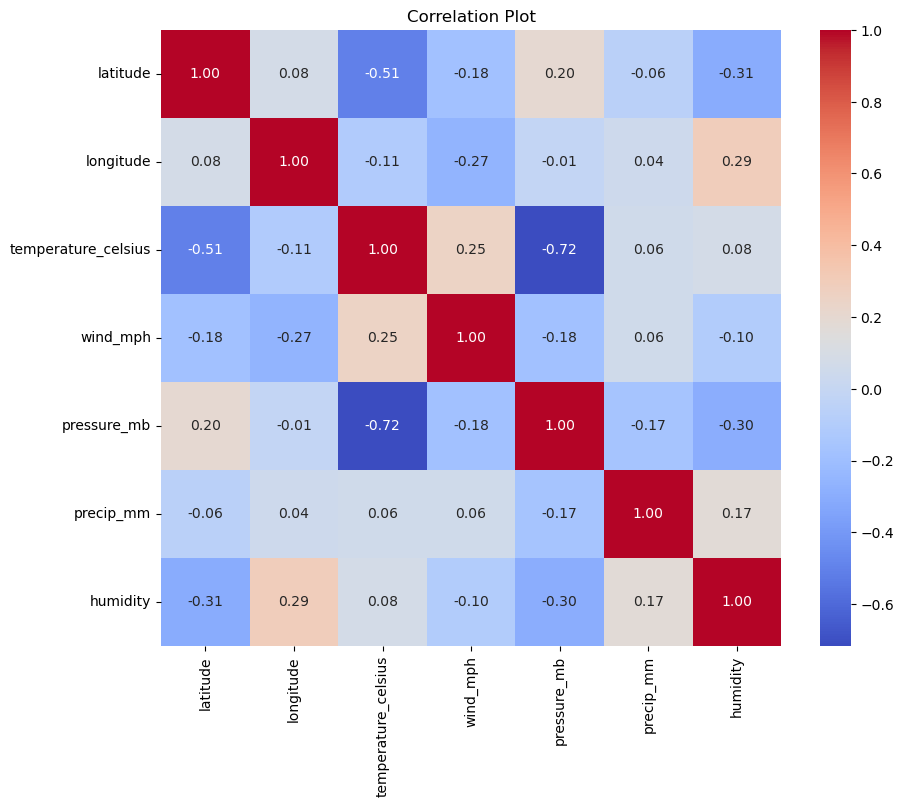

In [126]:
corr_matrix = df.corr()
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()


# No null or missing value

<Axes: >

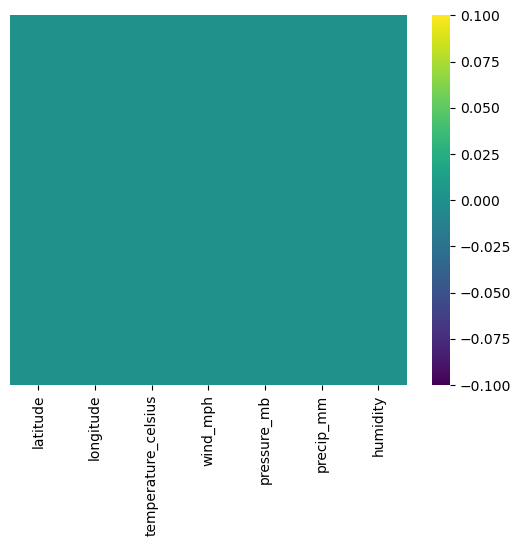

In [127]:
sns.heatmap(df.isnull(),yticklabels=False,cmap ='viridis')

# Mapbox plot

In [128]:
map_plot = px.density_mapbox(df.iloc[1:99999,:],lat="latitude", lon="longitude", z="temperature_celsius", radius=11,
                             title="Location-wise Temperature Heatmap")
map_plot.update_layout(mapbox_style="open-street-map")
map_plot.show()

In [129]:
continuous_feature = df.select_dtypes(include=['int', 'float']).columns

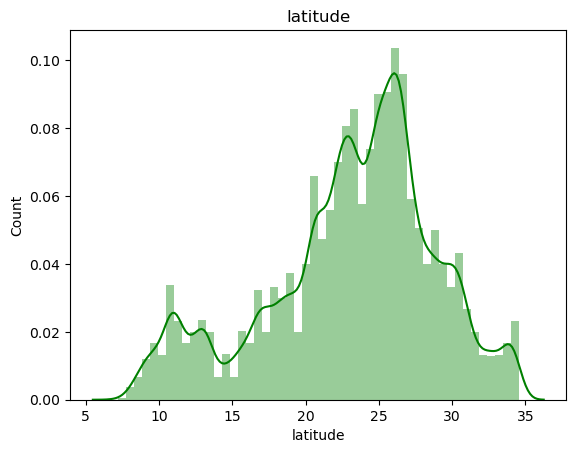

<Figure size 1500x1500 with 0 Axes>

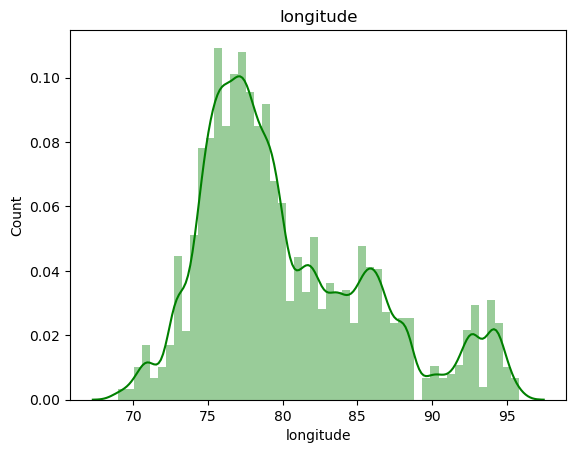

<Figure size 1500x1500 with 0 Axes>

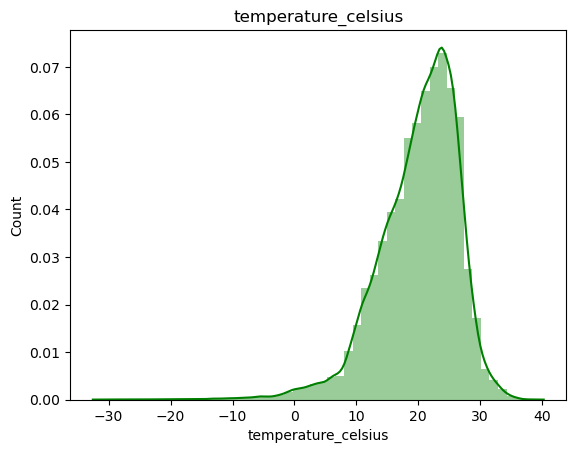

<Figure size 1500x1500 with 0 Axes>

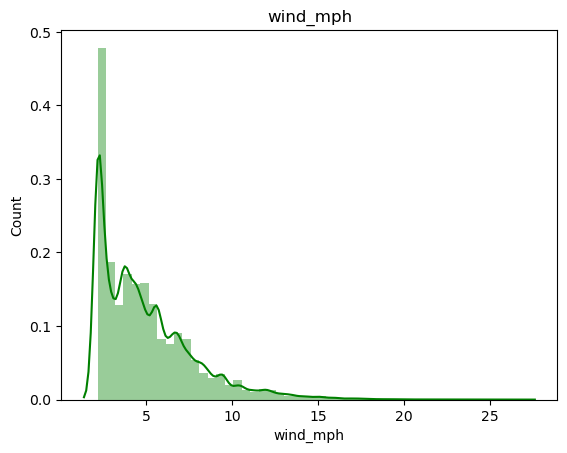

<Figure size 1500x1500 with 0 Axes>

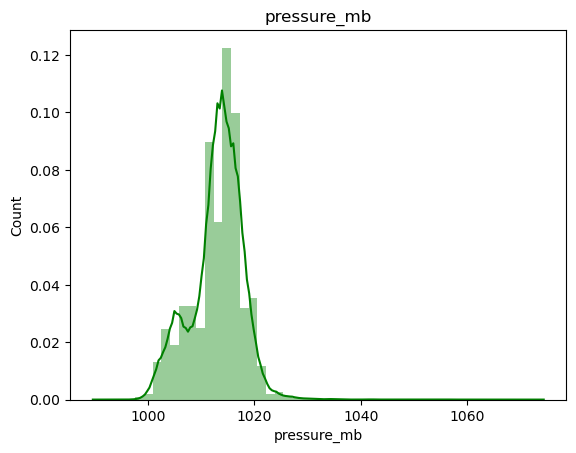

<Figure size 1500x1500 with 0 Axes>

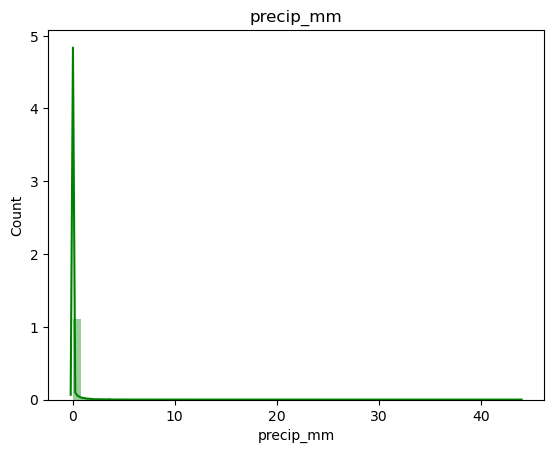

<Figure size 1500x1500 with 0 Axes>

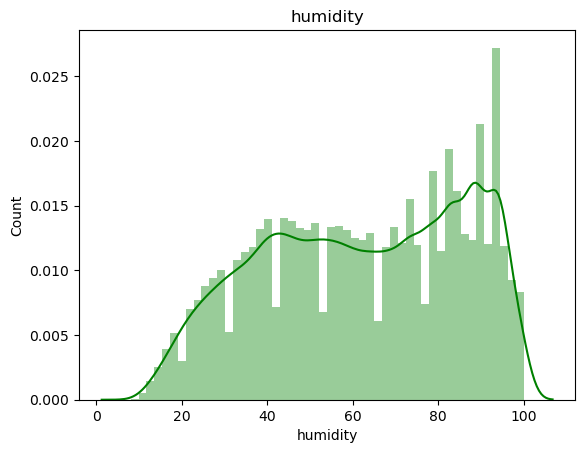

<Figure size 1500x1500 with 0 Axes>

In [130]:
# Iterate over each continuous feature and create a distribution plot
for feature in continuous_feature:
    sns.distplot(df[feature], color = 'g')
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

latitude


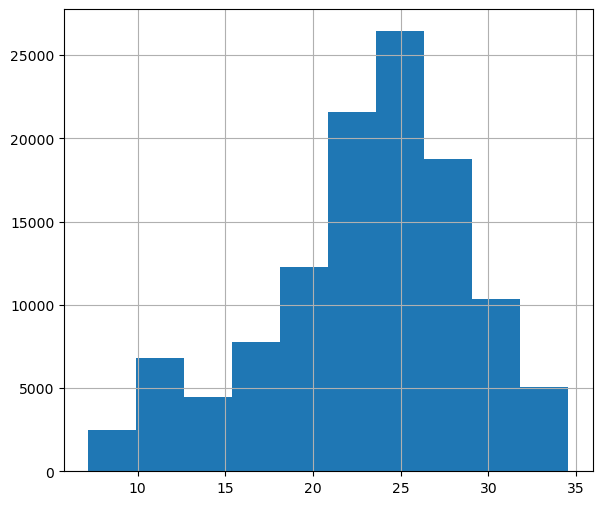

longitude


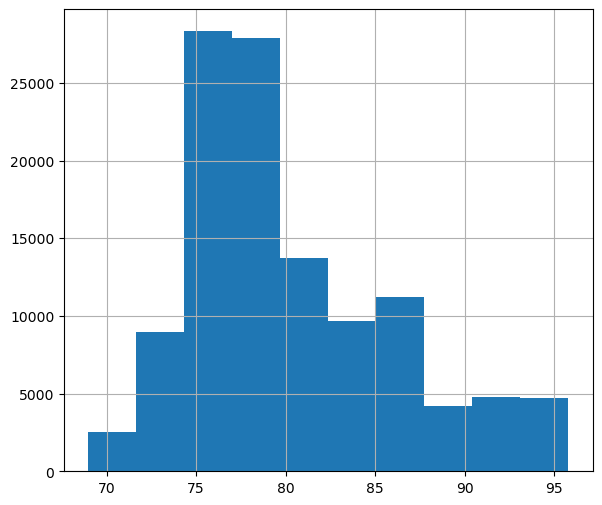

temperature_celsius


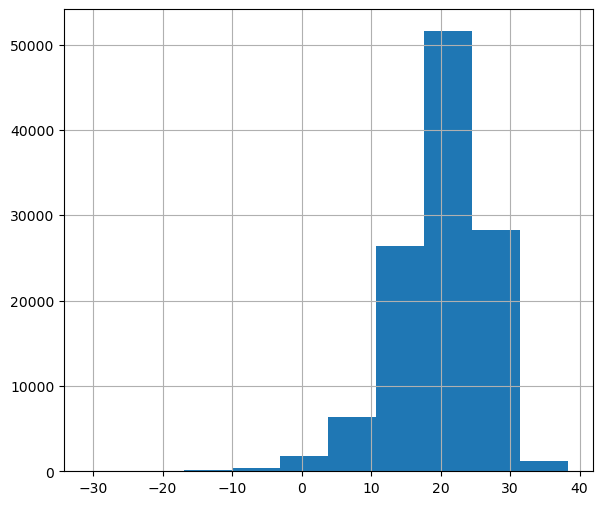

wind_mph


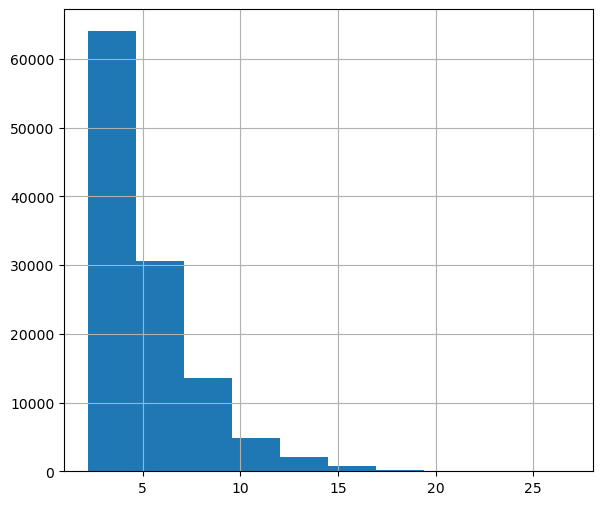

pressure_mb


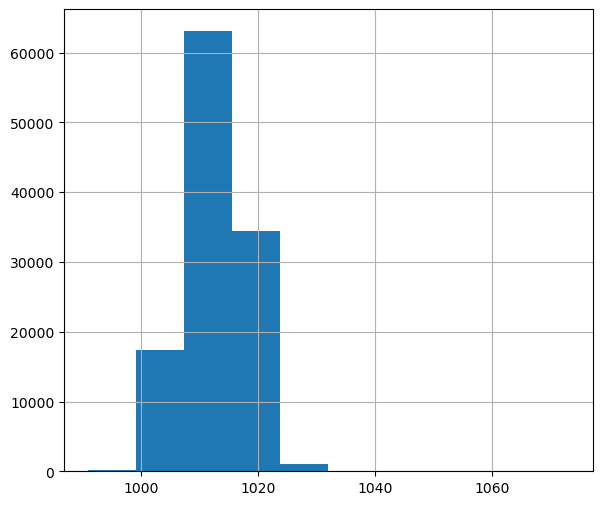

precip_mm


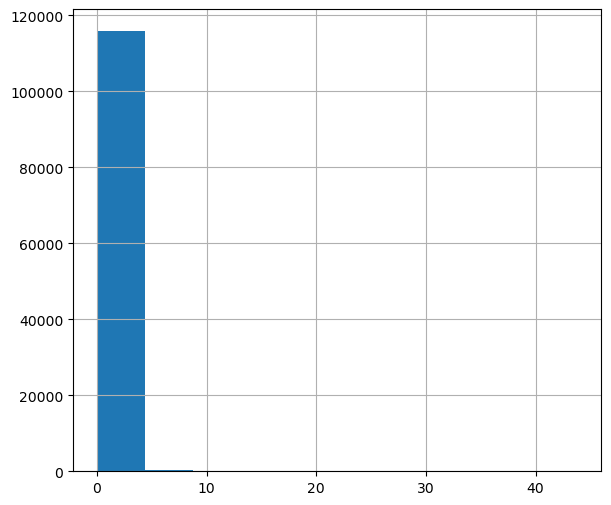

humidity


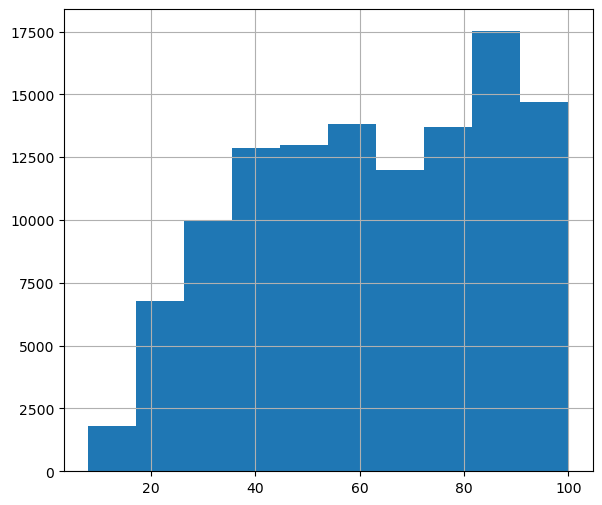

In [131]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    #plt.subplot(1, 2, 2)
    #stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

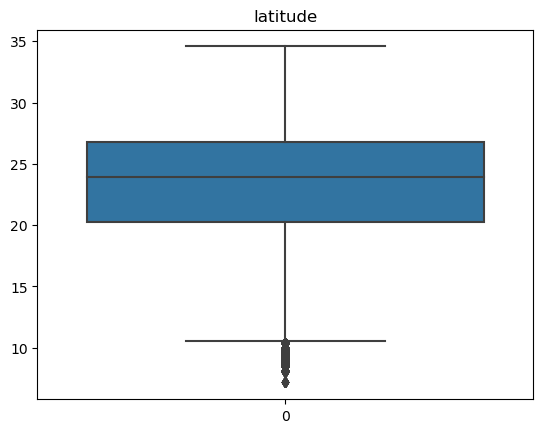

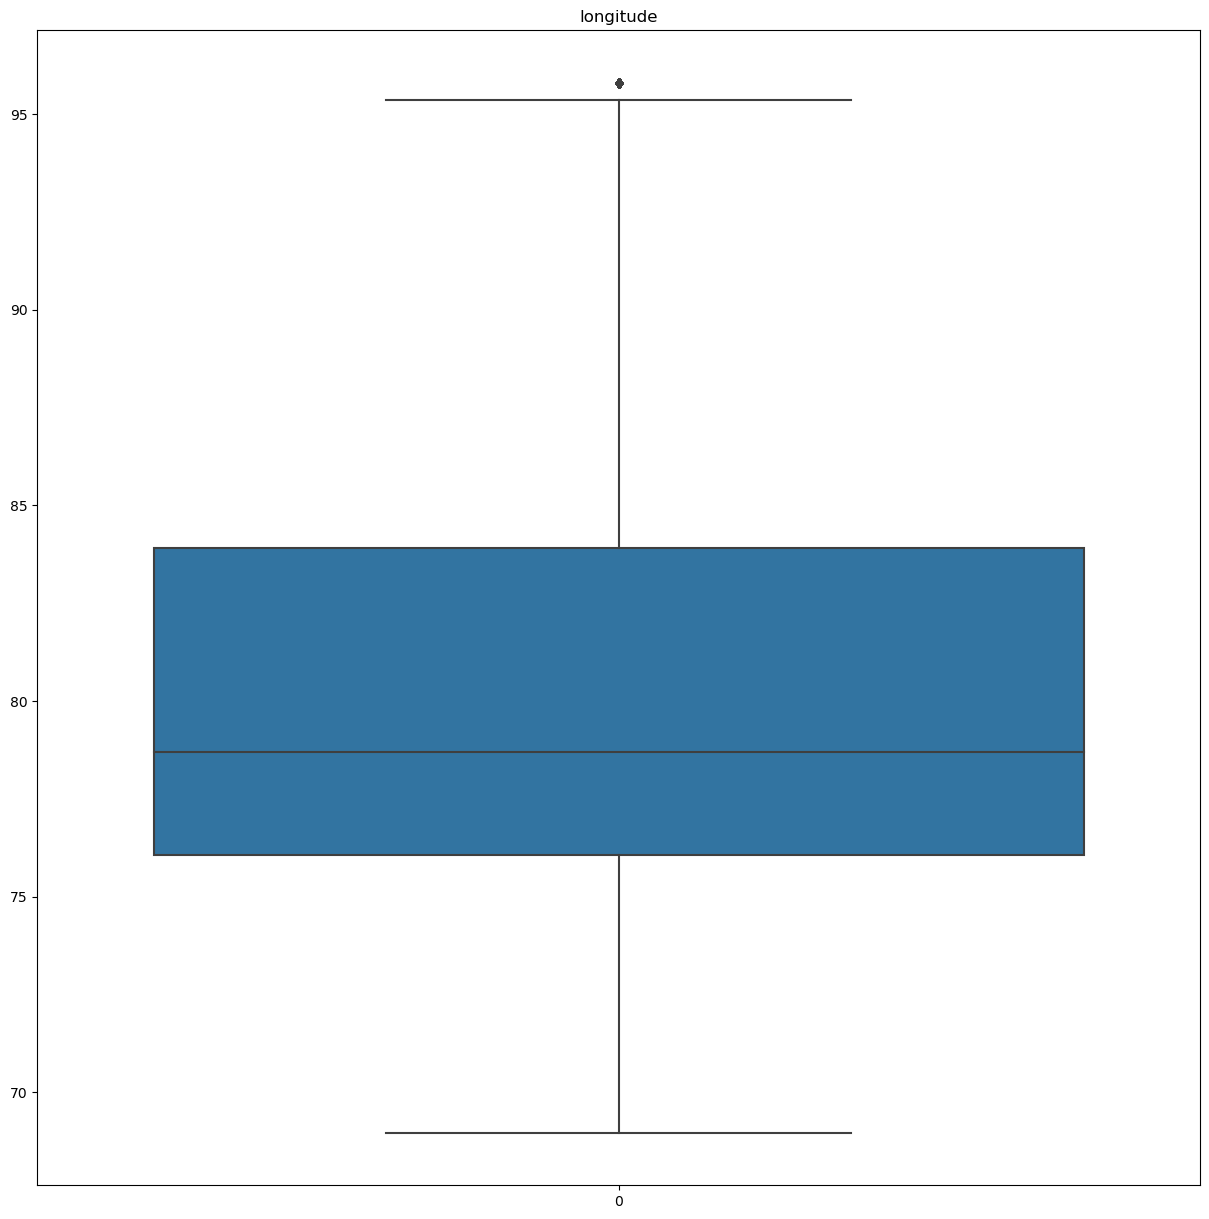

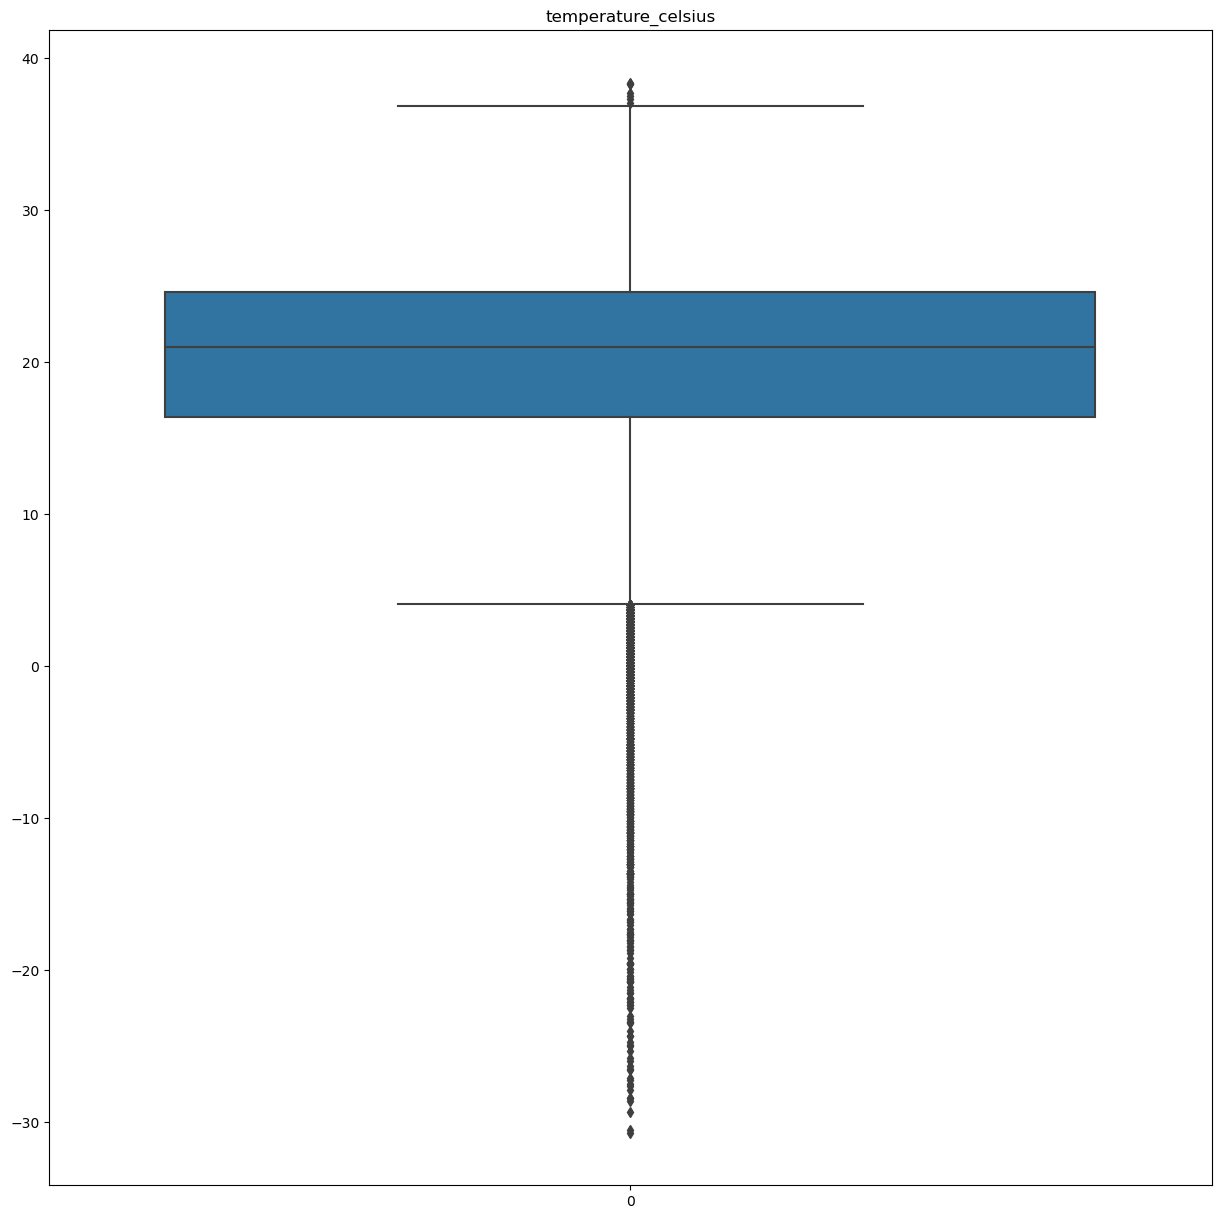

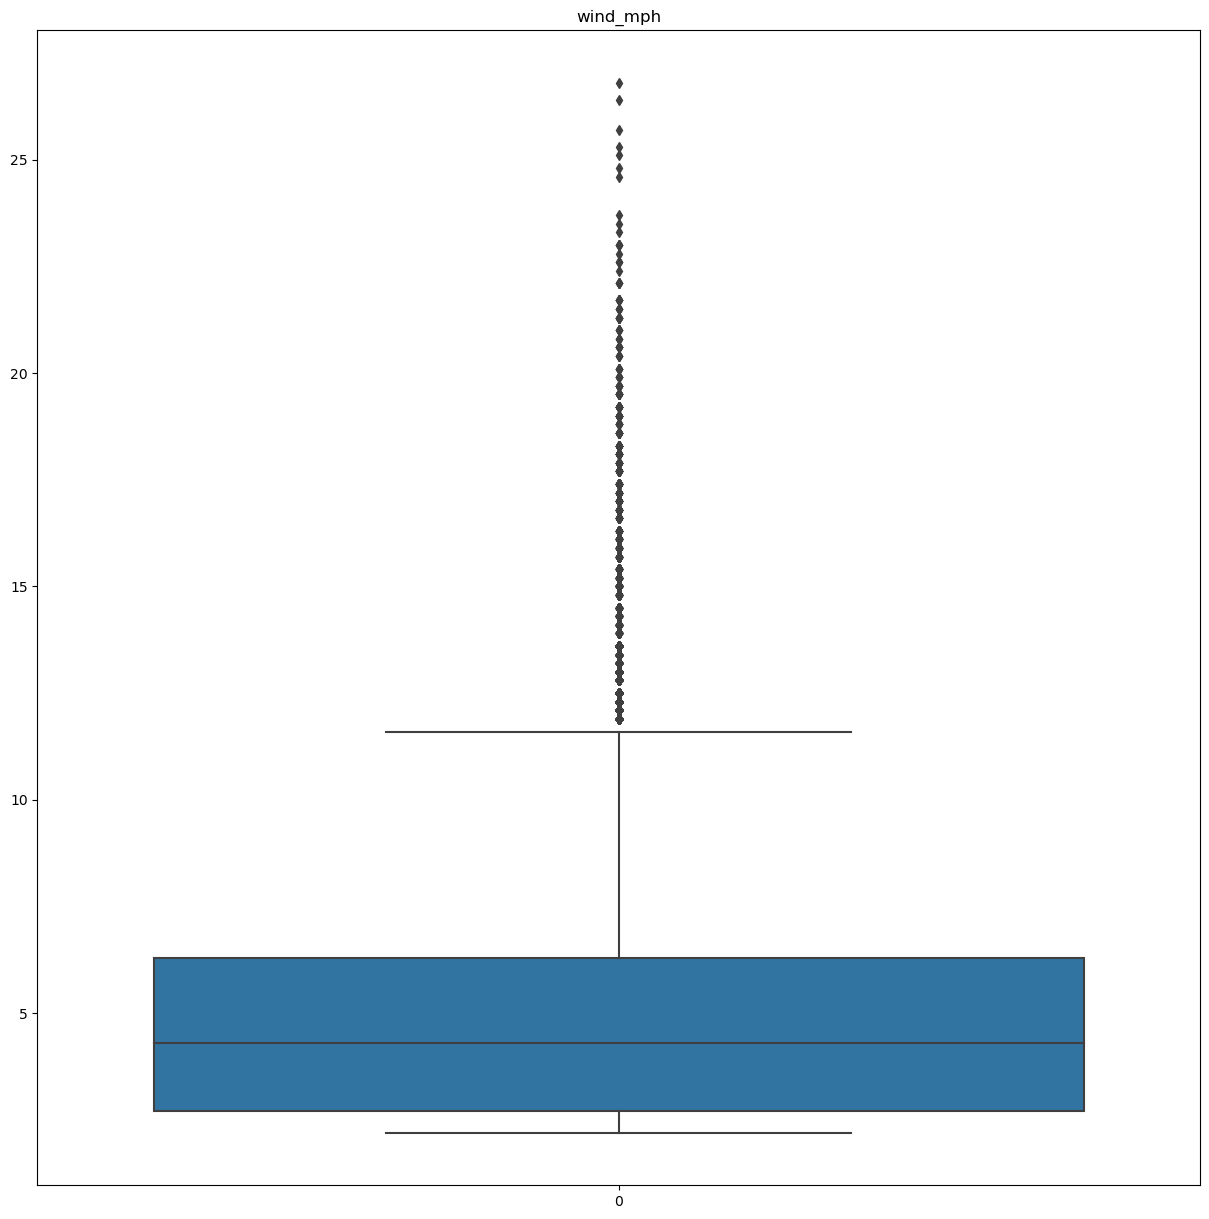

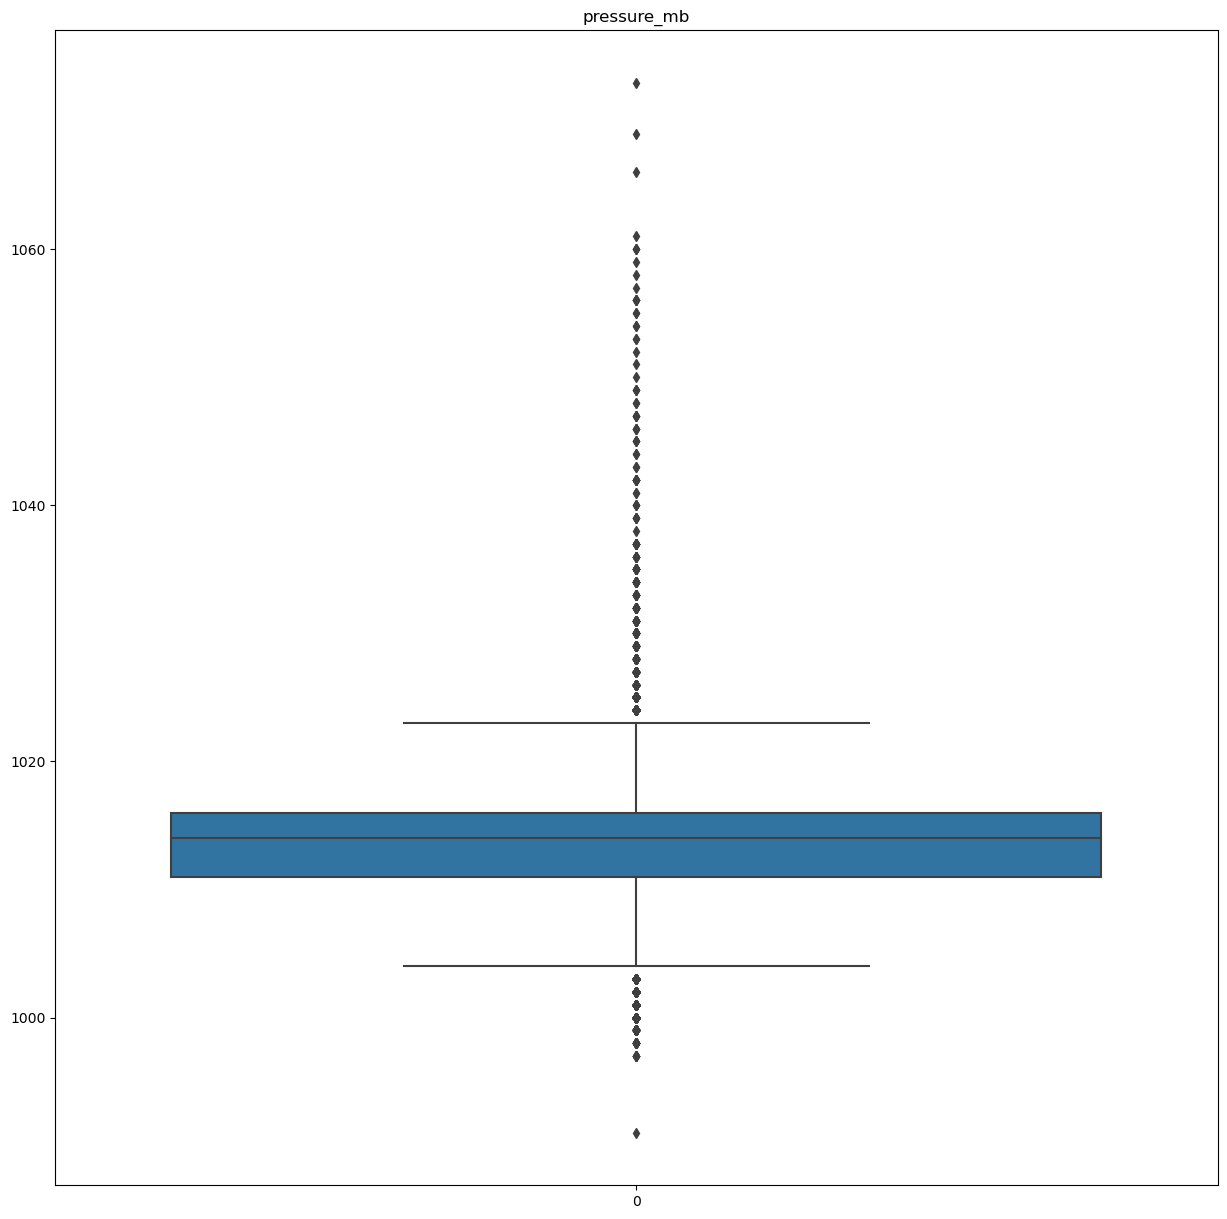

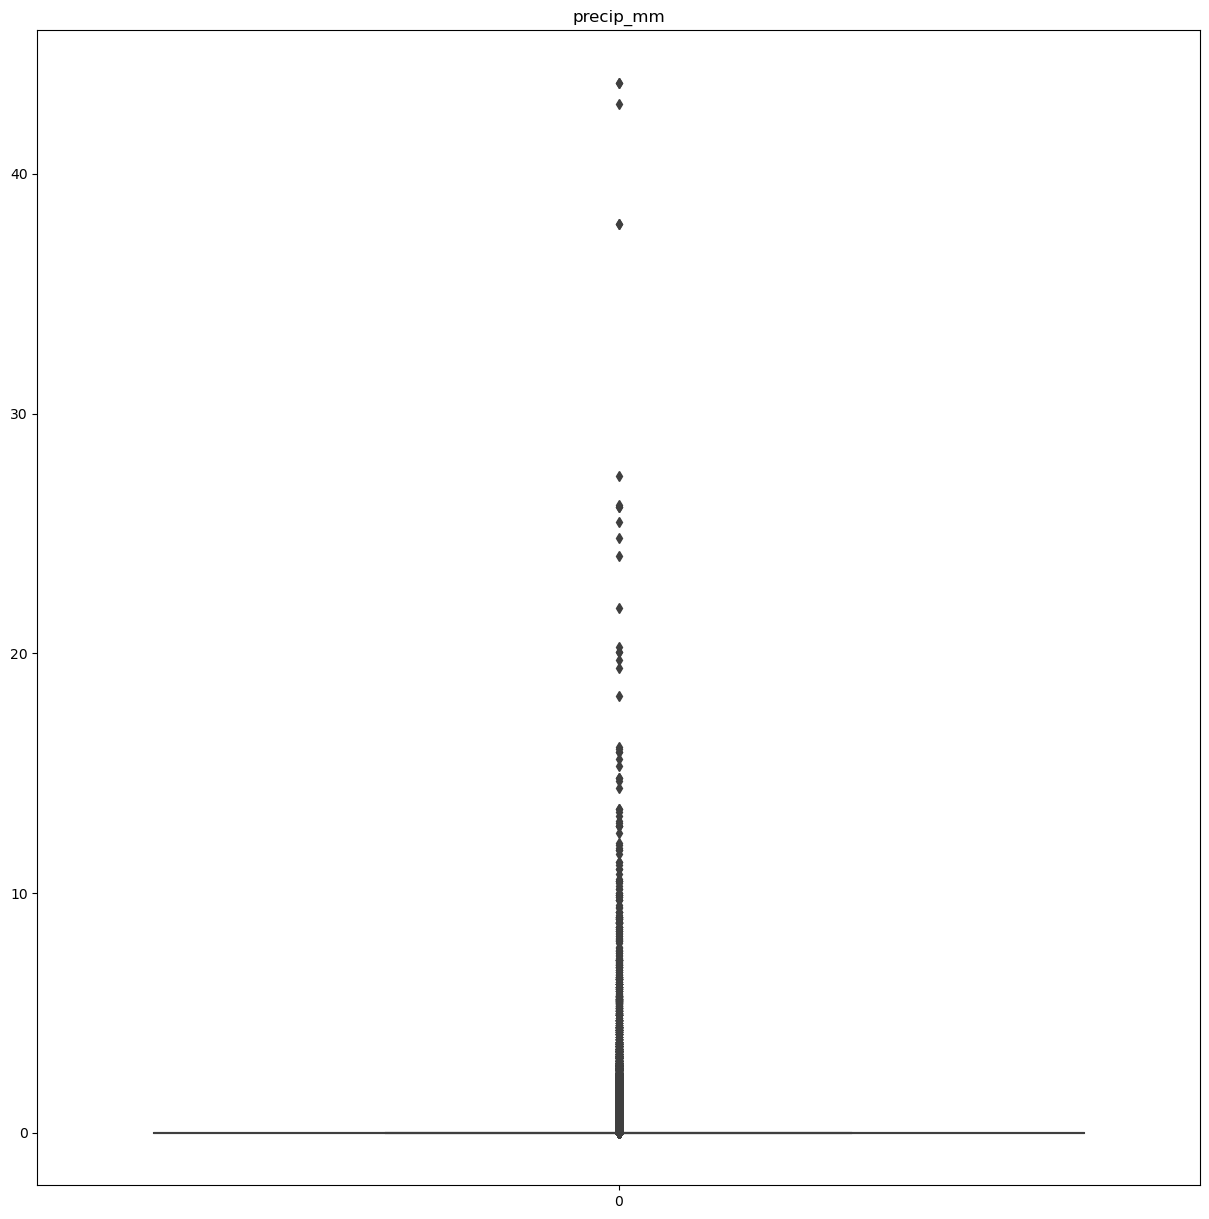

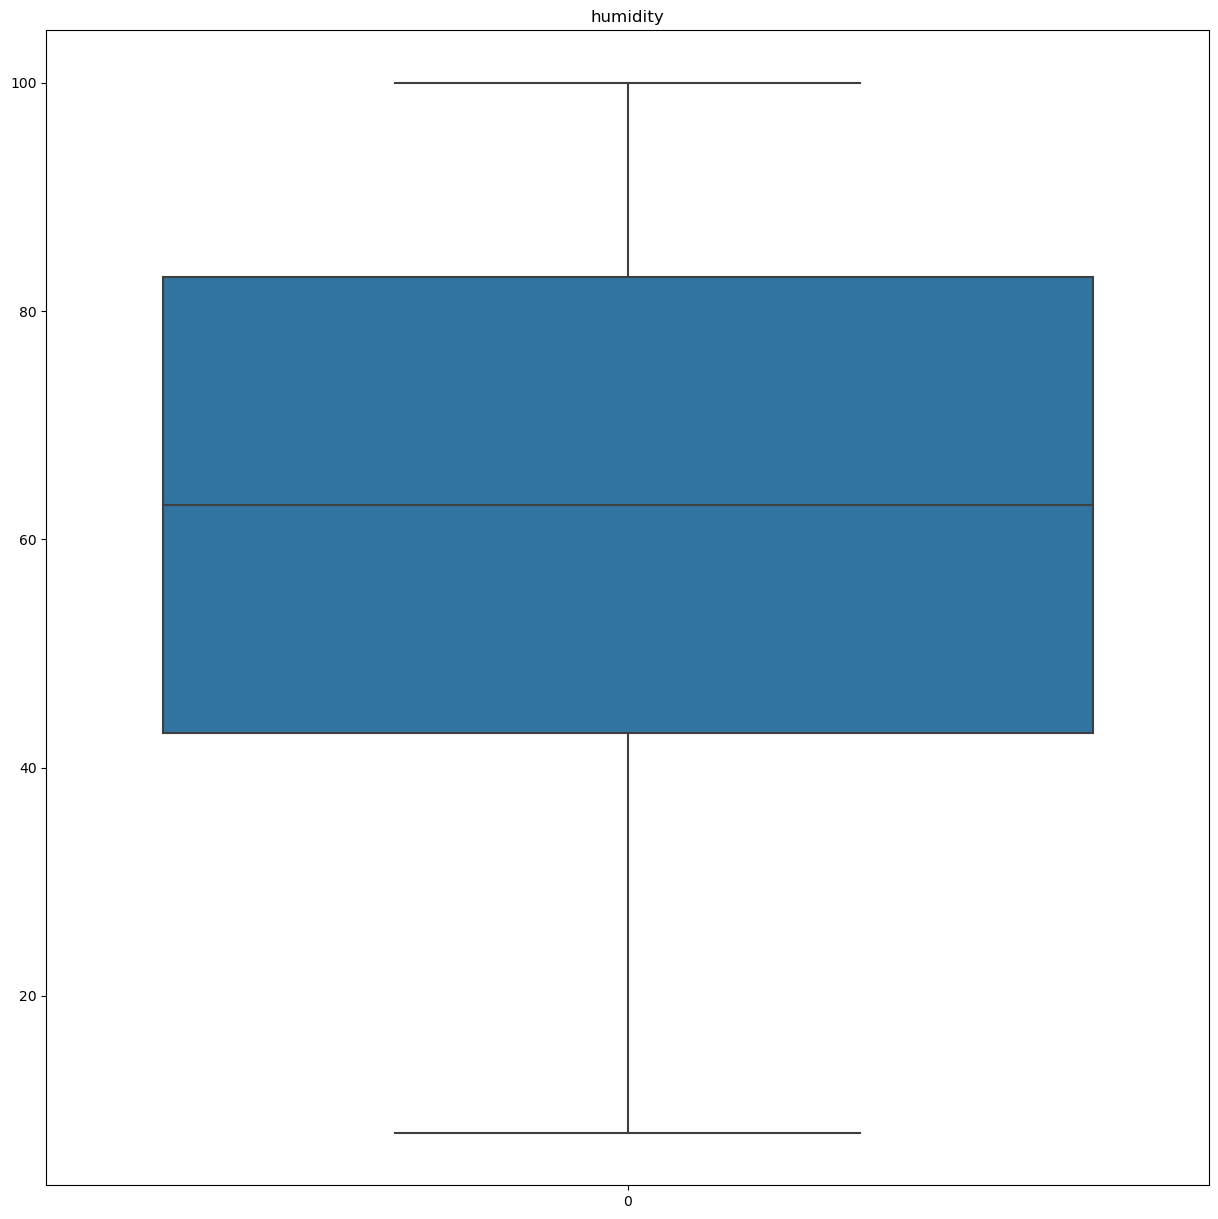

<Figure size 1500x1500 with 0 Axes>

In [132]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

# Feature Engineering


*  Apply lable encoding


# Label encoding

### Note
* for getting condition_text data u have run code from the first to till head 
* because in correlation plot we select only numerical values 

In [145]:
df["condition_text"].nunique()

49

In [146]:
count = df["condition_text"].str.strip().value_counts()
unique_values = df["condition_text"].unique()
df['condition_text'] = df['condition_text'].str.lower()
print(unique_values)

['Partly cloudy' 'Sunny' 'Cloudy' 'Mist' 'Patchy rain possible' 'Overcast'
 'Patchy light rain with thunder' 'Light rain shower'
 'Moderate or heavy rain shower' 'Clear' 'Light rain'
 'Torrential rain shower' 'Fog' 'Thundery outbreaks possible'
 'Patchy light drizzle' 'Moderate rain' 'Patchy light rain'
 'Moderate rain at times' 'Heavy rain' 'Heavy rain at times'
 'Light drizzle' 'Moderate or heavy rain with thunder'
 'Patchy snow possible' 'Moderate or heavy snow showers'
 'Light snow showers' 'Moderate or heavy snow with thunder'
 'Patchy light snow with thunder' 'Light sleet' 'Light freezing rain'
 'Patchy light snow' 'Patchy moderate snow' 'Light snow' 'Moderate snow'
 'Overcast ' 'Clear ' 'Cloudy ' 'Partly Cloudy ' 'Patchy rain nearby'
 'Thundery outbreaks in nearby' 'Heavy snow'
 'Patchy light snow in area with thunder'
 'Patchy light rain in area with thunder' 'Light sleet showers'
 'Moderate or heavy snow in area with thunder'
 'Moderate or heavy rain in area with thunder' 'Pat

In [147]:
threshold = 1000

In [148]:
# create new obj to show only above 1000 data
repl = count [count>=threshold].index

In [149]:
repl

Index(['Clear', 'Mist', 'Partly cloudy', 'Patchy rain possible',
       'Light rain shower', 'Overcast', 'Partly Cloudy', 'Fog', 'Cloudy',
       'Patchy rain nearby'],
      dtype='object', name='condition_text')

# Feature Encoding

## Label Encoding


In [150]:
from sklearn.preprocessing import LabelEncoder


In [151]:
le = LabelEncoder()

In [152]:
# label encoding use here on condtion_text
le.fit(repl)

LabelEncoder()

In [153]:
le.transform(repl)

array([0, 4, 7, 9, 3, 5, 6, 2, 1, 8])

In [154]:
le.classes_

array(['Clear', 'Cloudy', 'Fog', 'Light rain shower', 'Mist', 'Overcast',
       'Partly Cloudy', 'Partly cloudy', 'Patchy rain nearby',
       'Patchy rain possible'], dtype=object)

In [155]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)


{'Clear': 0, 'Cloudy': 1, 'Fog': 2, 'Light rain shower': 3, 'Mist': 4, 'Overcast': 5, 'Partly Cloudy': 6, 'Partly cloudy': 7, 'Patchy rain nearby': 8, 'Patchy rain possible': 9}


In [156]:
df.dtypes

location_name           object
latitude               float64
longitude              float64
last_updated            object
temperature_celsius    float64
condition_text          object
wind_mph               float64
pressure_mb            float64
precip_mm              float64
humidity                 int64
dtype: object

In [157]:
df.index

RangeIndex(start=0, stop=116111, step=1)

In [158]:
df['last_updated']=pd.to_datetime(df['last_updated'])

In [159]:
df

location_name  latitude  longitude        last_updated  \
0         Ashoknagar     24.57      77.72 2023-08-29 10:45:00   
1             Raisen     23.33      77.80 2023-08-29 10:45:00   
2         Chhindwara     22.07      78.93 2023-08-29 10:45:00   
3              Betul     21.86      77.93 2023-08-29 10:45:00   
4        Hoshangabad     22.75      77.72 2023-08-29 10:45:00   
...              ...       ...        ...                 ...   
116106        Niwari     28.88      77.53 2024-03-31 21:30:00   
116107       Saitual     23.97      92.58 2024-03-31 21:30:00   
116108       Ranipet     12.93      79.33 2024-03-31 21:30:00   
116109       Tenkasi      8.97      77.30 2024-03-31 21:30:00   
116110        Pendra     22.77      81.95 2024-03-31 21:30:00   

        temperature_celsius condition_text  wind_mph  pressure_mb  precip_mm  \
0                      27.5  partly cloudy      12.8       1008.0       0.00   
1                      27.5          sunny       9.6       1008.0       0.00   
2                      26.3  partly cloudy      11.4       1009.0       0.00   
3                      25.6         cloudy      10.5       1009.0       0.00   
4                      27.2         cloudy      10.1       1009.0       0.00   
...                     ...            ...       ...          ...        ...   
116106                 29.0           mist       9.4       1011.0       0.00   
116107                 16.8            fog       2.7       1011.0       0.06   
116108                 26.7         clear        7.8       1013.0       0.00   
116109                 30.0           mist       2.2       1011.0       0.00   
116110                 27.2         clear        4.5       1011.0       0.00   

        humidity  
0             67  
1             70  
2             70  
3             76  
4             74  
...          ...  
116106        40  
116107        97  
116108        76  
116109        70  
116110        38  

[116111 rows x 10 columns]

In [160]:
df.dtypes

location_name                  object
latitude                      float64
longitude                     float64
last_updated           datetime64[ns]
temperature_celsius           float64
condition_text                 object
wind_mph                      float64
pressure_mb                   float64
precip_mm                     float64
humidity                        int64
dtype: object

In [161]:
df['last_updated'].dt.year

0         2023
1         2023
2         2023
3         2023
4         2023
          ... 
116106    2024
116107    2024
116108    2024
116109    2024
116110    2024
Name: last_updated, Length: 116111, dtype: int32

In [162]:
df['Target']=df.shift(-1)['temperature_celsius']

In [163]:
df

location_name  latitude  longitude        last_updated  \
0         Ashoknagar     24.57      77.72 2023-08-29 10:45:00   
1             Raisen     23.33      77.80 2023-08-29 10:45:00   
2         Chhindwara     22.07      78.93 2023-08-29 10:45:00   
3              Betul     21.86      77.93 2023-08-29 10:45:00   
4        Hoshangabad     22.75      77.72 2023-08-29 10:45:00   
...              ...       ...        ...                 ...   
116106        Niwari     28.88      77.53 2024-03-31 21:30:00   
116107       Saitual     23.97      92.58 2024-03-31 21:30:00   
116108       Ranipet     12.93      79.33 2024-03-31 21:30:00   
116109       Tenkasi      8.97      77.30 2024-03-31 21:30:00   
116110        Pendra     22.77      81.95 2024-03-31 21:30:00   

        temperature_celsius condition_text  wind_mph  pressure_mb  precip_mm  \
0                      27.5  partly cloudy      12.8       1008.0       0.00   
1                      27.5          sunny       9.6       1008.0       0.00   
2                      26.3  partly cloudy      11.4       1009.0       0.00   
3                      25.6         cloudy      10.5       1009.0       0.00   
4                      27.2         cloudy      10.1       1009.0       0.00   
...                     ...            ...       ...          ...        ...   
116106                 29.0           mist       9.4       1011.0       0.00   
116107                 16.8            fog       2.7       1011.0       0.06   
116108                 26.7         clear        7.8       1013.0       0.00   
116109                 30.0           mist       2.2       1011.0       0.00   
116110                 27.2         clear        4.5       1011.0       0.00   

        humidity  Target  
0             67    27.5  
1             70    26.3  
2             70    25.6  
3             76    27.2  
4             74    25.9  
...          ...     ...  
116106        40    16.8  
116107        97    26.7  
116108        76    30.0  
116109        70    27.2  
116110        38     NaN  

[116111 rows x 11 columns]

In [164]:
df.ffill()


location_name  latitude  longitude        last_updated  \
0         Ashoknagar     24.57      77.72 2023-08-29 10:45:00   
1             Raisen     23.33      77.80 2023-08-29 10:45:00   
2         Chhindwara     22.07      78.93 2023-08-29 10:45:00   
3              Betul     21.86      77.93 2023-08-29 10:45:00   
4        Hoshangabad     22.75      77.72 2023-08-29 10:45:00   
...              ...       ...        ...                 ...   
116106        Niwari     28.88      77.53 2024-03-31 21:30:00   
116107       Saitual     23.97      92.58 2024-03-31 21:30:00   
116108       Ranipet     12.93      79.33 2024-03-31 21:30:00   
116109       Tenkasi      8.97      77.30 2024-03-31 21:30:00   
116110        Pendra     22.77      81.95 2024-03-31 21:30:00   

        temperature_celsius condition_text  wind_mph  pressure_mb  precip_mm  \
0                      27.5  partly cloudy      12.8       1008.0       0.00   
1                      27.5          sunny       9.6       1008.0       0.00   
2                      26.3  partly cloudy      11.4       1009.0       0.00   
3                      25.6         cloudy      10.5       1009.0       0.00   
4                      27.2         cloudy      10.1       1009.0       0.00   
...                     ...            ...       ...          ...        ...   
116106                 29.0           mist       9.4       1011.0       0.00   
116107                 16.8            fog       2.7       1011.0       0.06   
116108                 26.7         clear        7.8       1013.0       0.00   
116109                 30.0           mist       2.2       1011.0       0.00   
116110                 27.2         clear        4.5       1011.0       0.00   

        humidity  Target  
0             67    27.5  
1             70    26.3  
2             70    25.6  
3             76    27.2  
4             74    25.9  
...          ...     ...  
116106        40    16.8  
116107        97    26.7  
116108        76    30.0  
116109        70    27.2  
116110        38    27.2  

[116111 rows x 11 columns]

# Ridge Model importing

In [165]:
from sklearn.linear_model import Ridge

In [166]:
df.corr(numeric_only=True)

latitude  longitude  temperature_celsius  wind_mph  \
latitude             1.000000   0.076113            -0.506655 -0.182886   
longitude            0.076113   1.000000            -0.108947 -0.265754   
temperature_celsius -0.506655  -0.108947             1.000000  0.252777   
wind_mph            -0.182886  -0.265754             0.252777  1.000000   
pressure_mb          0.197711  -0.014484            -0.716535 -0.182228   
precip_mm           -0.063709   0.042163             0.060713  0.056689   
humidity            -0.305954   0.291569             0.080687 -0.102412   
Target              -0.390977  -0.078723             0.718535  0.188787   

                     pressure_mb  precip_mm  humidity    Target  
latitude                0.197711  -0.063709 -0.305954 -0.390977  
longitude              -0.014484   0.042163  0.291569 -0.078723  
temperature_celsius    -0.716535   0.060713  0.080687  0.718535  
wind_mph               -0.182228   0.056689 -0.102412  0.188787  
pressure_mb             1.000000  -0.165374 -0.296706 -0.570114  
precip_mm              -0.165374   1.000000  0.174830  0.064266  
humidity               -0.296706   0.174830  1.000000  0.127048  
Target                 -0.570114   0.064266  0.127048  1.000000

In [167]:
rr=Ridge(alpha=.1)

In [168]:
predictor=df.columns[~df.columns.isin(['location_name','latitude','condition_text','longitude','last_updated','precip_mm','Target'])]

In [169]:
predictor

Index(['temperature_celsius', 'wind_mph', 'pressure_mb', 'humidity'], dtype='object')

In [170]:
def backtest(df,model,predictor,start=3650,step=90):
    all_prediction=[]
    for i in range(start,df.shape[0],step):
        train=df.iloc[:i,:]
        test=df.iloc[i:(i+step),:]
        
        model.fit(train[predictor],train['Target'])
        
        preds=model.predict(test[predictor])
        
        preds=pd.Series(preds,index=test.index)
        combined=pd.concat([test['Target'],preds],axis=1)
        
        combined.columns=['actual','prediction']
        
        combined['diff']=(combined['prediction']-combined['actual']).abs()
        
        all_prediction.append(round(combined))
    return pd.concat(all_prediction)

In [171]:
prediction=backtest(df,rr,predictor)

In [172]:
prediction

actual  prediction  diff
3650      22.0        24.0   2.0
3651      24.0        23.0   2.0
3652      26.0        24.0   2.0
3653      26.0        24.0   2.0
3654      25.0        24.0   1.0
...        ...         ...   ...
116106    17.0        26.0   9.0
116107    27.0        19.0   8.0
116108    30.0        25.0   5.0
116109    27.0        27.0   0.0
116110     NaN        25.0   NaN

[112461 rows x 3 columns]

In [173]:
prediction.ffill(inplace=True)

## MAE

In [174]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(prediction['actual'],prediction['prediction'])

2.9313984403482096

In [175]:
prediction['diff'].mean()

2.920452423506816

In [176]:
def pct_diff(old,new):
    return round((new-old)/old)

def compute_rolling(df,horizon,col):
    label=f'rolling_{horizon}_{col}'
    
    df[label]=round(df[col].rolling(horizon).mean())
    df[f"{label}_pct"]=round(pct_diff(df[label],df[col]))
    return df

rolling_horizons=[3,14]

for horizon in rolling_horizons:
    for col in ['temperature_celsius', 'wind_mph', 'pressure_mb', 'humidity']:
        df=compute_rolling(df,horizon,col)

In [177]:
df

location_name  latitude  longitude        last_updated  \
0         Ashoknagar     24.57      77.72 2023-08-29 10:45:00   
1             Raisen     23.33      77.80 2023-08-29 10:45:00   
2         Chhindwara     22.07      78.93 2023-08-29 10:45:00   
3              Betul     21.86      77.93 2023-08-29 10:45:00   
4        Hoshangabad     22.75      77.72 2023-08-29 10:45:00   
...              ...       ...        ...                 ...   
116106        Niwari     28.88      77.53 2024-03-31 21:30:00   
116107       Saitual     23.97      92.58 2024-03-31 21:30:00   
116108       Ranipet     12.93      79.33 2024-03-31 21:30:00   
116109       Tenkasi      8.97      77.30 2024-03-31 21:30:00   
116110        Pendra     22.77      81.95 2024-03-31 21:30:00   

        temperature_celsius condition_text  wind_mph  pressure_mb  precip_mm  \
0                      27.5  partly cloudy      12.8       1008.0       0.00   
1                      27.5          sunny       9.6       1008.0       0.00   
2                      26.3  partly cloudy      11.4       1009.0       0.00   
3                      25.6         cloudy      10.5       1009.0       0.00   
4                      27.2         cloudy      10.1       1009.0       0.00   
...                     ...            ...       ...          ...        ...   
116106                 29.0           mist       9.4       1011.0       0.00   
116107                 16.8            fog       2.7       1011.0       0.06   
116108                 26.7         clear        7.8       1013.0       0.00   
116109                 30.0           mist       2.2       1011.0       0.00   
116110                 27.2         clear        4.5       1011.0       0.00   

        humidity  ...  rolling_3_humidity  rolling_3_humidity_pct  \
0             67  ...                 NaN                     NaN   
1             70  ...                 NaN                     NaN   
2             70  ...                69.0                     0.0   
3             76  ...                72.0                     0.0   
4             74  ...                73.0                     0.0   
...          ...  ...                 ...                     ...   
116106        40  ...                31.0                     0.0   
116107        97  ...                52.0                     1.0   
116108        76  ...                71.0                     0.0   
116109        70  ...                81.0                    -0.0   
116110        38  ...                61.0                    -0.0   

        rolling_14_temperature_celsius  rolling_14_temperature_celsius_pct  \
0                                  NaN                                 NaN   
1                                  NaN                                 NaN   
2                                  NaN                                 NaN   
3                                  NaN                                 NaN   
4                                  NaN                                 NaN   
...                                ...                                 ...   
116106                            28.0                                 0.0   
116107                            27.0                                -0.0   
116108                            27.0                                -0.0   
116109                            27.0                                 0.0   
116110                            27.0                                 0.0   

        rolling_14_wind_mph  rolling_14_wind_mph_pct  rolling_14_pressure_mb  \
0                       NaN                      NaN                     NaN   
1                       NaN                      NaN                     NaN   
2                       NaN                      NaN                     NaN   
3                       NaN                      NaN                     NaN   
4                       NaN                      NaN                     NaN   
...                

In [178]:
df=df.iloc[14:,:]

In [179]:
df

location_name  latitude  longitude        last_updated  \
14             Satna     24.58      80.83 2023-08-29 10:45:00   
15        Chhatarpur     24.90      79.60 2023-08-29 10:45:00   
16            Indore     22.72      75.83 2023-08-29 10:45:00   
17            Ratlam     23.32      75.07 2023-08-29 10:45:00   
18             Harda     22.33      77.10 2023-08-29 10:45:00   
...              ...       ...        ...                 ...   
116106        Niwari     28.88      77.53 2024-03-31 21:30:00   
116107       Saitual     23.97      92.58 2024-03-31 21:30:00   
116108       Ranipet     12.93      79.33 2024-03-31 21:30:00   
116109       Tenkasi      8.97      77.30 2024-03-31 21:30:00   
116110        Pendra     22.77      81.95 2024-03-31 21:30:00   

        temperature_celsius condition_text  wind_mph  pressure_mb  precip_mm  \
14                     30.1  partly cloudy      11.2       1007.0       0.00   
15                     30.0          sunny      11.6       1007.0       0.00   
16                     26.0           mist      11.9       1012.0       0.00   
17                     26.5  partly cloudy      14.1       1009.0       0.00   
18                     28.4  partly cloudy      12.5       1009.0       0.00   
...                     ...            ...       ...          ...        ...   
116106                 29.0           mist       9.4       1011.0       0.00   
116107                 16.8            fog       2.7       1011.0       0.06   
116108                 26.7         clear        7.8       1013.0       0.00   
116109                 30.0           mist       2.2       1011.0       0.00   
116110                 27.2         clear        4.5       1011.0       0.00   

        humidity  ...  rolling_3_humidity  rolling_3_humidity_pct  \
14            58  ...                63.0                    -0.0   
15            60  ...                61.0                    -0.0   
16            74  ...                64.0                     0.0   
17            64  ...                66.0                    -0.0   
18            64  ...                67.0                    -0.0   
...          ...  ...                 ...                     ...   
116106        40  ...                31.0                     0.0   
116107        97  ...                52.0                     1.0   
116108        76  ...                71.0                     0.0   
116109        70  ...                81.0                    -0.0   
116110        38  ...                61.0                    -0.0   

        rolling_14_temperature_celsius  rolling_14_temperature_celsius_pct  \
14                                28.0                                 0.0   
15                                28.0                                 0.0   
16                                28.0                                -0.0   
17                                28.0                                -0.0   
18                                28.0                                 0.0   
...                                ...                                 ...   
116106                            28.0                                 0.0   
116107                            27.0                                -0.0   
116108                            27.0                                -0.0   
116109                            27.0                                 0.0   
116110                            27.0                                 0.0   

        rolling_14_wind_mph  rolling_14_wind_mph_pct  rolling_14_pressure_mb  \
14                     10.0                      0.0                  1008.0   
15                     10.0                      0.0                  1008.0   
16                     10.0                      0.0                  1009.0   
17                     10.0                      0.0                  1009.0   
18                     10.0                      0.0                  1009.0   
...                

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116097 entries, 14 to 116110
Data columns (total 27 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   location_name                       116097 non-null  object        
 1   latitude                            116097 non-null  float64       
 2   longitude                           116097 non-null  float64       
 3   last_updated                        116097 non-null  datetime64[ns]
 4   temperature_celsius                 116097 non-null  float64       
 5   condition_text                      116097 non-null  object        
 6   wind_mph                            116097 non-null  float64       
 7   pressure_mb                         116097 non-null  float64       
 8   precip_mm                           116097 non-null  float64       
 9   humidity                            116097 non-null  int64         
 10  Target 

In [181]:
def expand_mean(df1):
    return df1.expanding(1).mean()
for col in ['temperature_celsius', 'wind_mph', 'pressure_mb', 'humidity']:
    df[f"month_avg_{col}"]=df[col].groupby(df['last_updated'].dt.month,group_keys=False).apply(expand_mean)
    df[f"day_avg_{col}"]=df[col].groupby(df['last_updated'].dt.day_of_year,group_keys=False).apply(expand_mean)

In [182]:
df

location_name  latitude  longitude        last_updated  \
14             Satna     24.58      80.83 2023-08-29 10:45:00   
15        Chhatarpur     24.90      79.60 2023-08-29 10:45:00   
16            Indore     22.72      75.83 2023-08-29 10:45:00   
17            Ratlam     23.32      75.07 2023-08-29 10:45:00   
18             Harda     22.33      77.10 2023-08-29 10:45:00   
...              ...       ...        ...                 ...   
116106        Niwari     28.88      77.53 2024-03-31 21:30:00   
116107       Saitual     23.97      92.58 2024-03-31 21:30:00   
116108       Ranipet     12.93      79.33 2024-03-31 21:30:00   
116109       Tenkasi      8.97      77.30 2024-03-31 21:30:00   
116110        Pendra     22.77      81.95 2024-03-31 21:30:00   

        temperature_celsius condition_text  wind_mph  pressure_mb  precip_mm  \
14                     30.1  partly cloudy      11.2       1007.0       0.00   
15                     30.0          sunny      11.6       1007.0       0.00   
16                     26.0           mist      11.9       1012.0       0.00   
17                     26.5  partly cloudy      14.1       1009.0       0.00   
18                     28.4  partly cloudy      12.5       1009.0       0.00   
...                     ...            ...       ...          ...        ...   
116106                 29.0           mist       9.4       1011.0       0.00   
116107                 16.8            fog       2.7       1011.0       0.06   
116108                 26.7         clear        7.8       1013.0       0.00   
116109                 30.0           mist       2.2       1011.0       0.00   
116110                 27.2         clear        4.5       1011.0       0.00   

        humidity  ...  rolling_14_humidity  rolling_14_humidity_pct  \
14            58  ...                 67.0                     -0.0   
15            60  ...                 67.0                     -0.0   
16            74  ...                 67.0                      0.0   
17            64  ...                 66.0                     -0.0   
18            64  ...                 65.0                     -0.0   
...          ...  ...                  ...                      ...   
116106        40  ...                 55.0                     -0.0   
116107        97  ...                 59.0                      1.0   
116108        76  ...                 59.0                      0.0   
116109        70  ...                 61.0                      0.0   
116110        38  ...                 63.0                     -0.0   

        month_avg_temperature_celsius  day_avg_temperature_celsius  \
14                          30.100000                    30.100000   
15                          30.050000                    30.050000   
16                          28.700000                    28.700000   
17                          28.150000                    28.150000   
18                          28.200000                    28.200000   
...                               ...                          ...   
116106                      23.438068                    27.140367   
116107                      23.437677                    27.121429   
116108                      23.437869                    27.120658   
116109                      23.438256                    27.125912   
116110                      23.438478                    27.126047   

        month_avg_wind_mph  day_avg_wind_mph  month_avg_pressure_mb  \
14               11.200000         11.200000            1007.000000   
15               11.400000         11.400000            1007.000000   
16               11.566667         11.566667            1008.666667   
17               12.200000         12.200000            1008.750000   
18               12.260000         12.260000            1008.800000   
...                    ...               ...                    ...   
116106            6.021104          7.471009            1012.861666   
116

In [183]:
predictor=df.columns[~df.columns.isin(['location_name','latitude','condition_text','longitude','last_updated','precip_mm','Target'])]

In [184]:
predictor

Index(['temperature_celsius', 'wind_mph', 'pressure_mb', 'humidity',
       'rolling_3_temperature_celsius', 'rolling_3_temperature_celsius_pct',
       'rolling_3_wind_mph', 'rolling_3_wind_mph_pct', 'rolling_3_pressure_mb',
       'rolling_3_pressure_mb_pct', 'rolling_3_humidity',
       'rolling_3_humidity_pct', 'rolling_14_temperature_celsius',
       'rolling_14_temperature_celsius_pct', 'rolling_14_wind_mph',
       'rolling_14_wind_mph_pct', 'rolling_14_pressure_mb',
       'rolling_14_pressure_mb_pct', 'rolling_14_humidity',
       'rolling_14_humidity_pct', 'month_avg_temperature_celsius',
       'day_avg_temperature_celsius', 'month_avg_wind_mph', 'day_avg_wind_mph',
       'month_avg_pressure_mb', 'day_avg_pressure_mb', 'month_avg_humidity',
       'day_avg_humidity'],
      dtype='object')

# GUI

In [200]:
import urllib.parse
import requests
from tkinter import messagebox
import logging
import tkinter as tk
from tkinter import ttk
from PIL import Image, ImageTk

# Configure logging
logging.basicConfig(filename="weatherbot.log", level=logging.INFO, 
                    format="%(asctime)s - %(levelname)s - %(message)s")

class WeatherBot:
    def __init__(self, api_key):
        self.api_key = api_key
        self.responses = {
            "hi": "Hello! How can I help you?",
            "hello": "Hi there! What can I assist you with?",
            "help": "Sure, I can help you with weather predictions. Just enter the city name!",
            "thanks": "You're welcome! If you need anything else, feel free to ask."
        }

    def get_response(self, message):
        message = message.lower()
        return self.responses.get(message, "OK, this is the information of the city that you entered.")

    def get_weather(self, city):
        city_encoded = urllib.parse.quote(city)
        url = f"http://api.openweathermap.org/data/2.5/weather?q={city_encoded}&appid={self.api_key}&units=metric"
        try:
            response = requests.get(url)
            response.raise_for_status()
            data = response.json()

            if data.get('cod') != 200:
                raise ValueError(f"Error: {data.get('message', 'Unknown error')}")

            weather_condition = data['weather'][0]['main']
            weather_info = (f"Weather: {weather_condition}\n"
                            f"Temperature: {data['main']['temp']} °C\n"
                            f"Humidity: {data['main']['humidity']} %\n"
                            f"Pressure: {data['main']['pressure']} mb\n"
                            f"Wind Speed: {data['wind']['speed']} m/s")

            insert_message(f"User: {city}")
            insert_message(f"Bot: {weather_info}")

            prediction_info = self.get_predictive_weather(city)
            insert_message(f"Bot: {prediction_info}")

            self.show_weather_image(weather_condition)

        except requests.HTTPError as http_err:
            if response.status_code == 404:
                logging.error(f"City '{city}' not found: {http_err}")
                #insert_message(f"Bot: City '{city}' not found. Please check the spelling or try another city. Ensure you include the country code if needed.")
            else:
                logging.error(f"HTTP Error: {http_err}")
                messagebox.showerror("HTTP Error", f"Failed to get weather data: {http_err}")
        except requests.RequestException as req_err:
            logging.error(f"Request Exception: {req_err}")
            messagebox.showerror("Error", f"Error connecting to weather service: {req_err}")
        except ValueError as val_err:
            logging.error(f"Value Error: {val_err}")
            messagebox.showerror("Error", f"{val_err}")
        except Exception as e:
            logging.error(f"Unexpected Error: {e}")
            messagebox.showerror("Error", f"An unexpected error occurred: {e}")

    def get_predictive_weather(self, city):
        try:
            city_lower = city.lower()
            temp = df[df['location_name'].str.lower() == city_lower]['rolling_14_temperature_celsius'].iloc[-1]
            humidity = df[df['location_name'].str.lower() == city_lower]['rolling_14_humidity'].iloc[-1]
            wind_speed = df[df['location_name'].str.lower() == city_lower]['rolling_14_wind_mph'].iloc[-1]
            pressure = df[df['location_name'].str.lower() == city_lower]['rolling_14_pressure_mb'].iloc[-1]
            return (f"Predictive_Temperature: {temp} °C\n"
                    f"Predictive_Humidity: {humidity} %\n"
                    f"Predictive_WindSpeed: {wind_speed} m/s\n"
                    f"Predictive_Pressure: {pressure} mb")
        except IndexError:
            return "Predictive data not available for this city."

    def show_weather_image(self, weather_condition):
        image_path = ""
        if weather_condition == "Clouds":
            image_path = r"C:\Users\Vaishnavi Daule\Desktop\All png.image\Cloudy.png (2).jpeg"
        elif weather_condition == "Clear":
            image_path = r"C:\Users\Vaishnavi Daule\Desktop\All png.image\Clear.jpeg"
        elif weather_condition == "Sunny":
            image_path = r"C:\Users\Vaishnavi Daule\Desktop\All png.image\sunny.png.jpeg"
        elif weather_condition == "Rain":
            image_path = r"C:\Users\Vaishnavi Daule\Desktop\All png.image\rainy.png.jpeg"
        elif weather_condition == "Haze":
            image_path = r"C:\Users\Vaishnavi Daule\Desktop\All png.image\haze.jpeg"
        elif weather_condition == "Smoke":
            image_path = r"C:\Users\Vaishnavi Daule\Desktop\All png.image\smoke.jpeg"

        if image_path:
            try:
                weather_image = Image.open(image_path)
                weather_photo = ImageTk.PhotoImage(weather_image)
                weather_image_label.config(image=weather_photo)
                weather_image_label.image = weather_photo  # Keep a reference to avoid garbage collection
            except Exception as e:
                logging.error(f"Error loading image: {e}")
                print(f"Error loading image: {e}")

def send_message():
    user_message = city_entry.get().strip()
    if not user_message:
        messagebox.showwarning("Input Error", "Please enter a city name.")
        return
    
    insert_message(f"You: {user_message}")

    bot_response = bot.get_response(user_message)
    insert_message(f"Bot: {bot_response}")

    if user_message.replace(" ", "").isalpha():
        bot.get_weather(user_message)
    else:
        messagebox.showwarning("Input Error", "Please enter a valid city name.")

def clear_chat():
    chat_box.config(state=tk.NORMAL)
    chat_box.delete(1.0, tk.END)
    chat_box.config(state=tk.DISABLED)
    weather_image_label.config(image=None)

def insert_message(message):
    chat_box.config(state=tk.NORMAL)
    chat_box.insert(tk.END, message + "\n")
    chat_box.config(state=tk.DISABLED)

# Create main window
root = tk.Tk()
root.title("Weather Prediction Chat")

# Set the window size and position it at the center of the screen
window_width = 800
window_height = 600
screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()
x_position = (screen_width - window_width) // 2
y_position = (screen_height - window_height) // 2
root.geometry(f"{window_width}x{window_height}+{x_position}+{y_position}")

# Set background image
bg_image_path = r"C:\Users\Vaishnavi Daule\Downloads\B --Nature.jpeg"
bg_image = Image.open(bg_image_path)
bg_photo = ImageTk.PhotoImage(bg_image)

# Create label with background image
bg_label = tk.Label(root, image=bg_photo)
bg_label.image = bg_photo  # Keep a reference to the image
bg_label.place(x=0, y=0, relwidth=1, relheight=1)

# Create chat frame
chat_frame = ttk.Frame(root, borderwidth=2, relief="groove")
chat_frame.pack(padx=20, pady=20)

# Create chat box
chat_box = tk.Text(chat_frame, width=50, height=20, wrap=tk.WORD, state=tk.DISABLED)
chat_box.pack(side=tk.LEFT)

# Create scrollbar
scrollbar = ttk.Scrollbar(chat_frame, orient=tk.VERTICAL, command=chat_box.yview)
scrollbar.pack(side=tk.RIGHT, fill=tk.Y)
chat_box.config(yscrollcommand=scrollbar.set)

# Create entry frame
entry_frame = ttk.Frame(root, padding=(20, 10))
entry_frame.pack()

# Create label
label = ttk.Label(entry_frame, text="Say something:")
label.grid(row=0, column=0, padx=5, pady=5, sticky="w")

# Create entry
city_entry = ttk.Entry(entry_frame, width=30)
city_entry.grid(row=0, column=1, padx=5, pady=5, sticky="w")

# Create send button
send_button = ttk.Button(entry_frame, text="Send", command=send_message)
send_button.grid(row=0, column=2, padx=5, pady=5, sticky="e")

# Create clear button
clear_button = ttk.Button(entry_frame, text="Clear Chat", command=clear_chat, cursor="hand2")
clear_button.grid(row=0, column=3, padx=5, pady=5, sticky="e")

# Create weather image label
weather_image_label = tk.Label(root)
weather_image_label.pack(pady=20)

# Initialize WeatherBot with your API key
api_key = "734be55b262f9e7726b4ef402bb52931"
bot = WeatherBot(api_key)

# Run the application
root.mainloop()
